### 1. Import packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read the 3 datasets into dataframes

In [5]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

### 3. Apply info, shape, describe, and find the number of missing values in the data.

#### Applying functions to the Data.csv file

In [6]:
data.info()
print("\nThe data shape is:",data.shape)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

The data shape is: (100000, 4)


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
data.isnull().values.any()

False

#### Applying functions to the item.csv file

In [8]:
item.info()
print("\nThe data shape is:",item.shape)
item.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
item.isnull().values.any()

False

#### Applying functions to the user.csv file

In [10]:
user.info()
print("\nThe data shape is:",user.shape)
user.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 25.8+ KB

The data shape is: (943, 5)


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [11]:
user.isnull().values.any()

False

**Observations:**  
1. 1682 different movies were given ratings concluded from the movie id max and the shape of item.csv.  
2. 943 users reviewed movies which was concluded from the user id max from Data.csv and the shape of user.csv.  
3. The average movie rating across all 100000 ratings is 3.52986.  
4. There are no missing values in Data.csv, item.csv, or user.csv.


### 4. Find the number of movies per genre using the item data

In [12]:
item_sum_df = pd.DataFrame(item.sum(),columns=["Count"])
drop = ["movie id", "movie title", "release date"]
genres = item_sum_df.drop(index=drop, axis=0).sort_values("Count",ascending=False)
genres

,Count
Drama,725
Comedy,505
Action,251
Thriller,251
Romance,247
Adventure,135
Childrens,122
Crime,109
Sci-Fi,101
Horror,92


**Insights:**
1. There is 1 movie that is defined with the genre 'unknown'.
2. The 'Drama' genre has the most ratings with 725.
3. The 'Fantasy' genre has the least ratings with 22.

### 5. Drop the movie where the genre is unknown

In [13]:
item_df = pd.DataFrame(item)
removed_movie_title = item_df["movie title"][item_df.index[item_df['unknown'] == 1][0]]
removed_movie_release_date = item_df["release date"][item_df.index[item_df['unknown'] == 1][0]]
item_df_1 = item_df.drop(index=item_df.index[item_df['unknown'] == 1], inplace = False)
print("The shape of the original item df is",item_df.shape)
print("The shape of the new item df without the movie listed as 'unkown' is",item_df_1.shape)
print("The name of the movie removed is",removed_movie_title,"which was released on",removed_movie_release_date)

The shape of the original item df is (1681, 22)
The shape of the new item df without the movie listed as 'unkown' is (1680, 22)
The name of the movie removed is Good Morning  which was released on 4-Feb-1971


**Insights:**
1. The shape of the original item df is (1681, 22)
2. The shape of the new item df without the movie listed as 'unkown' is (1680, 22)
3. The name of the movie removed is Good Morning  which was released on 4-Feb-1971



### 6. Find the movies that have more than one genre

#### Dataframe which displays the movie name and its number of genres.


In [14]:
num_of_genres = pd.DataFrame(item_df_1.iloc[:,4:].sum(axis=1),columns=["Number of Generes"])
title_genres = pd.concat([item_df_1["movie title"],num_of_genres], axis=1)
title_genres

,movie title,Number of Generes
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


#### Determining the number of movies which have more than one genre.


In [15]:
#Add movie genres wihtin row with the below code
#title_genres.sum(axis=1)

#Determine which movies have more than 1 genre category with the below code and output NaN if == 1.
#title_genres.sum(axis=1).where(title_genres["Number of Generes"]>1)

#Drop andy Nan values and display array length
print("The number of movies which have more than one genre listed is",len(title_genres.sum(axis=1).where(title_genres["Number of Generes"]>1).dropna()))
1680-849

The number of movies which have more than one genre listed is 849


831

**Insights:**
1. There are 1680 movies with valid listed movie genres (genre is not 'unkown') 
2. There are 849 movies with more than one genre listed
3. There are 831 movies with only one genre listed



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [16]:
a = 'My*cat*is*brown'
print(a.split('*'))

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

['My', 'cat', 'is', 'brown']
brown
brown


#### Displot for Age

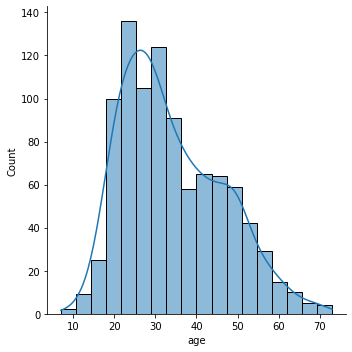

In [17]:
sns.displot(user["age"],kde=True);

#### Countplot for Ratings

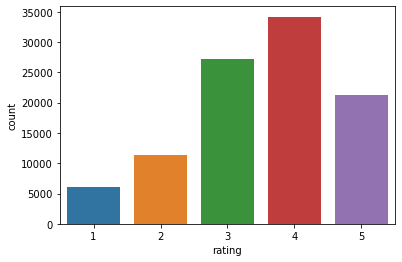

In [18]:
sns.countplot(x="rating", data=data);

#### Countplot for Gender

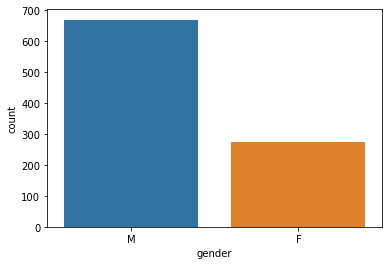

In [19]:
sns.countplot(x="gender",data=user);

#### Countplot for Occupation

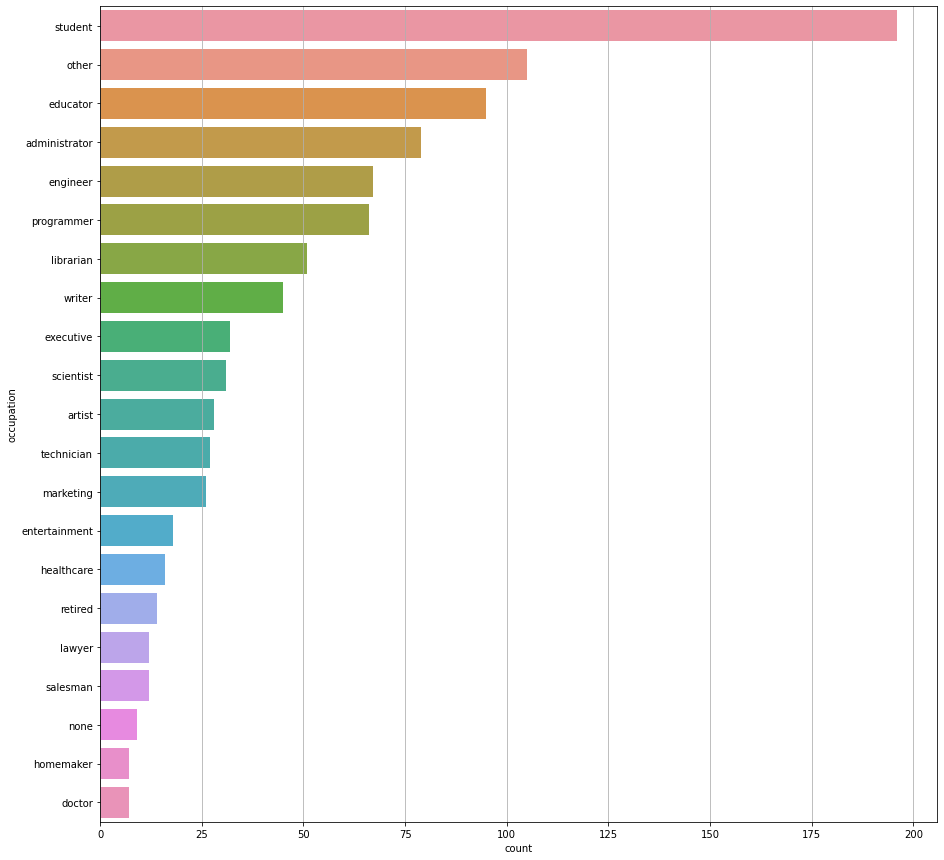

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
ax.grid()
sns.countplot(y="occupation", data=user, order = user['occupation'].value_counts().index, ax=ax);

#### Countplot for release year

In [21]:
import re
text_to_search = " ".join(item_df_1["release date"])
pattern = re.compile(r'\d{4}\b')
matches = pattern.finditer(text_to_search)
c=[]
for mat in matches:
    c.append(mat.group(0))

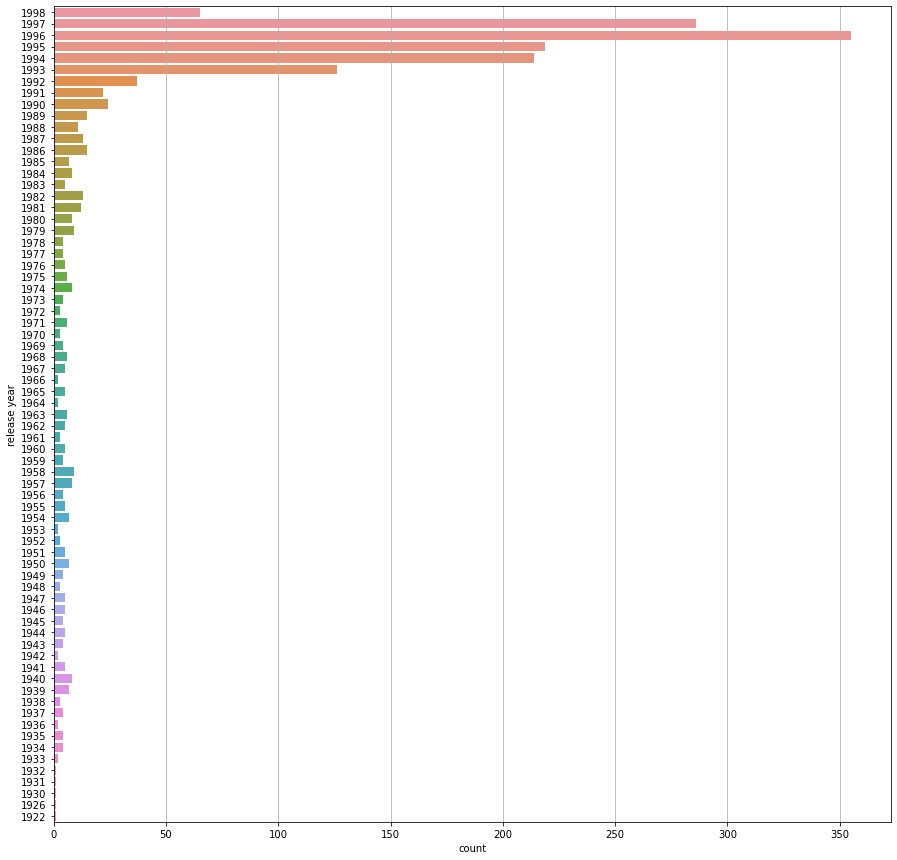

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.grid()
release_year = pd.DataFrame(c,columns=["release year"]).sort_values(by="release year", ascending=False)
sns.countplot(y="release year", data=release_year); 

### 8. Visualize how popularity of genres has changed over the years

#### Below is a data frame where the release year is the index and the genre is the column names

In [23]:
#first made an array of all the years each movie was released in 
date=[]
for i in item_df_1["release date"]:
    date.append(int(i[-4:]))

#converted array into DF
#joined DF with item_df_1 and dropped the columns ['movie id','movie title',"unknown","release date"]
#grouped by "release year" so there were not anymultiple rows with the same year
#added the movie genres released that year
#sorted by release year

dg_release_year = pd.DataFrame(date,columns=["release year"]).join(item_df_1.drop(['movie id','movie title',"unknown","release date"],1)).sort_values(by="release year")
dg = dg_release_year.groupby("release year")[list(dg_release_year.columns[1:])].sum()
dg

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,27.0,16.0,4.0,20.0,80.0,10.0,9.0,96.0,3.0,0.0,8.0,2.0,4.0,36.0,5.0,27.0,8.0,6.0
1995,39.0,21.0,5.0,19.0,63.0,11.0,4.0,90.0,4.0,2.0,15.0,3.0,4.0,36.0,15.0,36.0,5.0,2.0
1996,46.0,26.0,9.0,22.0,114.0,21.0,18.0,161.0,6.0,1.0,12.0,10.0,6.0,40.0,14.0,49.0,8.0,2.0


#### Below is the total number of movie genres released in a year as a percentage

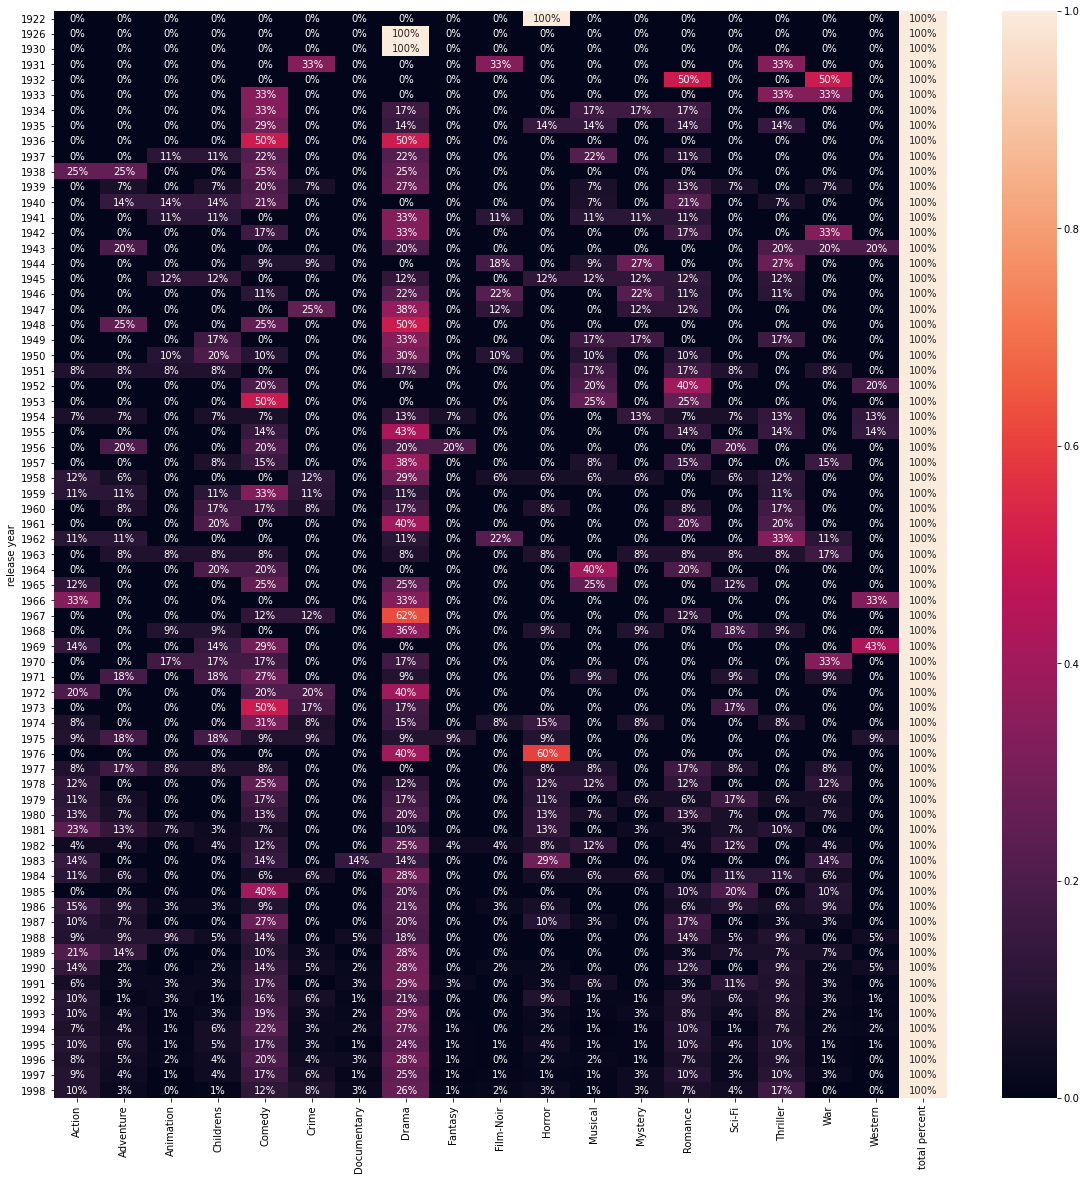

In [24]:
# item dataset to get count of movies released in a particular year, store that value in a new column as 'total'
# divide the value of each genre in that year by total percentage number of release in a particular year. `
#(df.div(df['total'], axis= 0) * 100)
year_total = pd.DataFrame(dg.sum(axis=1),columns=["total percent"])
year_total

dg_1 = dg.join(year_total).div(dg.join(year_total)["total percent"], axis=0)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=dg_1, annot=True, fmt='.0%');

**Insights:**
- Drama movies have been produced since 1922 to 1998.
- Comedy movies seem to be the second most produced through the years 1922 - 1998. 
- There appears to be a large quantity of Horror and Drama movies released in 1922, 1926, and 1930. However; there was only one movie released those years within this sample.


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times

#### Find the count of ratings and average ratings for every movie

In [25]:
movie_id_avg_rate = data[["movie id","rating"]].groupby(by="movie id").mean().round(decimals=2)
movie_id_count = pd.DataFrame(data["movie id"].value_counts()).rename(columns={"movie id":"count"})
movie_id_avg_rate_count = movie_id_avg_rate.join(movie_id_count,sort=True)

movie_id_avg_rate_count

,rating,count
movie id,,
1,3.88,452
2,3.21,131
3,3.03,90
4,3.55,209
5,3.30,86
...,...,...
1678,1.00,1
1679,3.00,1
1680,2.00,1


#### Slice the movies which have more than 100 ratings and sort according to average rating such that movie which highest rating is on top.

In [26]:
movie_id_count_100 = pd.DataFrame(movie_id_avg_rate_count[movie_id_avg_rate_count['count'] >= 100]).sort_values(by="rating",ascending=False)
movie_id_count_100

,rating,count
movie id,,
408,4.49,112
318,4.47,298
169,4.47,118
483,4.46,243
64,4.45,283
...,...,...
358,2.62,143
260,2.57,127
325,2.55,128


#### Select top 25 movies

In [27]:
#The below section checks if the movie with an unknown genre description is in the top 25 list
top_25 = movie_id_count_100.head(25)
movie_unknown_genre = item_df.index[item_df['unknown'] == 1][0]
if item_df.index[item_df['unknown'] == 1][0] not in list(top_25.sort_index().index):
    print("NOTE: The name of the movie with an 'unknown' genre is Good Morning which has a movie id:", movie_unknown_genre,"is not in the top 25 movies.")
    
#The below section selects the top 25 movies and displays their name, avg rating, and rating count 

top_25_movies = pd.merge(top_25, item[["movie id","movie title"]].set_index(keys="movie id"), how='inner', on='movie id')[["movie title","rating","count"]]
top_25_movies


NOTE: The name of the movie with an 'unknown' genre is Good Morning which has a movie id: 1371 is not in the top 25 movies.


,movie title,rating,count
movie id,,,
408,"Close Shave, A",4.49,112
318,Schindler's List,4.47,298
169,"Wrong Trousers, The",4.47,118
483,Casablanca,4.46,243
64,"Shawshank Redemption, The",4.45,283
603,Rear Window,4.39,209
12,"Usual Suspects, The",4.39,267
50,Star Wars,4.36,583
178,12 Angry Men,4.34,125


### 10. Check for the validity of the below statements with respect to the data provided

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

In [30]:
ud = user.merge(data, on ="user id", how="inner")
df = item.merge(ud, on ="movie id", how="inner")
df

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,user id,age,gender,occupation,zip code,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,1,24,M,technician,85711,5,874965758
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,2,53,F,other,94043,4,888550871
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,5,33,F,other,15213,4,875635748
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,6,42,M,executive,98101,4,883599478
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,10,53,M,lawyer,90703,4,877888877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,863,17,M,student,60089,1,889289570
99987,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,1,0,0,863,17,M,student,60089,3,889289491
99988,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,863,17,M,student,60089,2,889289570
99989,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,896,28,M,writer,91505,3,887160722


In [31]:
genre_by_gender = df.groupby("gender").sum().loc[:,"Action":"Western"]
genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [34]:
genre_by_gender["Total"] = df["gender"].value_counts()
genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,25738
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,74253


In [49]:
genre_by_gender = genre_by_gender.div(genre_by_gender.Total,axis=0)*100
genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
gender,,,,,,,,,,,,,,,,,,,
F,21.143834,12.203745,3.865879,8.672002,31.346647,6.970239,0.726552,42.769446,1.410366,1.495843,4.650711,5.602611,5.105292,22.760121,10.214469,19.760665,8.504934,1.441448,100.0
M,27.132910,14.291678,3.515009,6.666397,29.310600,8.431983,0.768992,38.903479,1.331933,1.815415,5.548597,4.729775,5.294062,18.319799,13.603491,22.606494,9.708699,1.997226,100.0


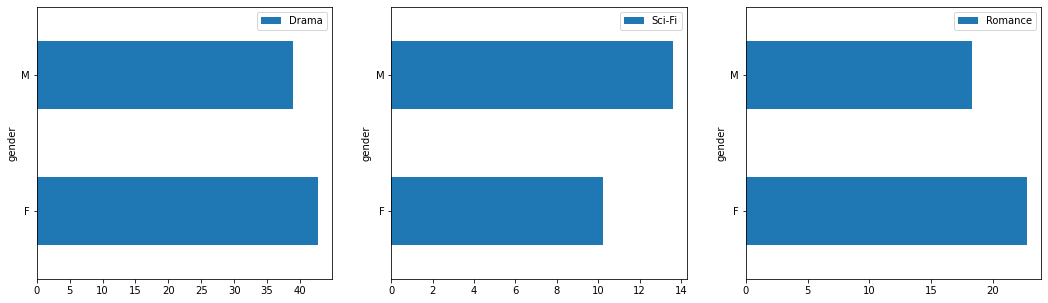

In [40]:
fig, ax = plt.subplots(ncols= 3, figsize=(18,5))

genre_by_gender["Drama"].plot(kind="barh", ax=ax[0], label="Drama")
ax[0].legend();

genre_by_gender["Sci-Fi"].plot(kind="barh", ax=ax[1], label="Sci-Fi")
ax[1].legend();

genre_by_gender["Romance"].plot(kind="barh", ax=ax[2], label="Romance")
ax[2].legend();

plt.show()

In [42]:
genre_by_gender[["Drama","Sci-Fi","Romance"]]

,Drama,Sci-Fi,Romance
gender,,,
F,42.769446,10.214469,22.760121
M,38.903479,13.603491,18.319799


**Conclusion:**
* Men watch more Drama than women.
        False. 42.77% of total ratings by Women were for Drama movies compared to 38.90% of total Mens ratings.
* Women watch more Sci-Fi than men.
        False. 10.21% of total ratings by Women were for Sci-Fi movies compared to 13.60% of total Mens ratings.
* Men watch more Romance than women.
        False. 22.76% of total ratings by Women were for Romance movies compared to 18.32% of total Mens ratings.
    
